# 데이콘 Basic 의류 제조 회사 생산성 예측 AI 경진대회
- 의류 제조 공정의 생산성 예측 AI 알고리즘 개발

## 1. Library 및 Data Load

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [3]:
# warnings 무시
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

## 2. EDA 및 시각화

In [5]:
train.head()

,ID,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
1,TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650
2,TRAIN_0002,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
3,TRAIN_0003,Quarter1,sweing,Thursday,0.80,11.41,968,0.14120,50,0,0,0,30,0.80057
4,TRAIN_0004,Quarter1,sweing,Thursday,0.80,25.90,1170,0.07407,50,0,0,0,56,0.80038


- ID: 고유 id
- quarter: 한 달을 5그룹으로 나누어 나타낸 열
- department: 부서 (범주형)
- day: 요일 (범주형)
- targeted_productivity: 기관이 매일 팀 별로 설정한 목표 생산성
- smv: 작업에 할당된 시간(분)
- wip: 진행 중이거나 미완성인 품목 수
- over_time: 각 팀의 초과 근무 시간(분)
- incentive: 인센티브 양
- idle_time: 생산이 중단된 시간
- idle_men: 생산 중단으로 인해 유휴 상태인 근로자 수
- no_of_style_change: 특정 제품의 스타일 변경 횟수
- no_of_workers: 팀 별 작업자 수
- actual_productivity: 실제 생산성

In [6]:
print(train.shape, test.shape)

(1197, 14) (818, 13)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 131.0+ 

In [8]:
train.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


In [9]:
fig = plt.figure(figsize=(15, 10))

<Figure size 1080x720 with 0 Axes>

In [10]:
target = 'actual_productivity'

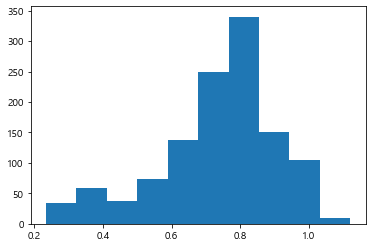

In [11]:
# target 빈도
plt.hist(train[target], 10)
plt.show()

<AxesSubplot:xlabel='department', ylabel='count'>

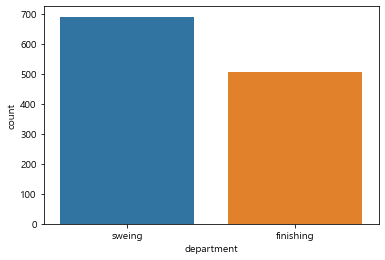

In [12]:
# 부서별 생산성
sns.countplot(data=train, x='department')

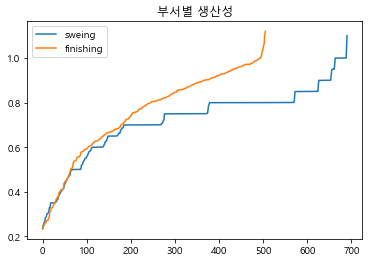

In [13]:
train[train.department=='sweing'][target].sort_values().reset_index(drop=True).plot()
train[train.department=='finishing'][target].sort_values().reset_index(drop=True).plot()

plt.title('부서별 생산성')
plt.legend(['sweing', 'finishing'])

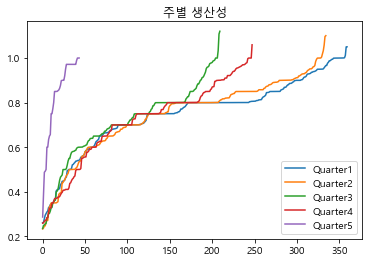

In [14]:
# 주별 생산성
def quarter(num):
    tmp = train[train.quarter==f'Quarter{num}'][target].reset_index(drop=True)
    tmp.sort_values(inplace=True)
    tmp.reset_index(drop=True, inplace=True)
    return tmp

tmp1 = quarter(1)
tmp1.plot()

tmp2 = quarter(2)
tmp2.plot()

tmp3 = quarter(3)
tmp3.plot()

tmp4 = quarter(4)
tmp4.plot()

tmp5 = quarter(5)
tmp5.plot()

plt.title('주별 생산성')
plt.legend(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'])

<AxesSubplot:xlabel='day', ylabel='count'>

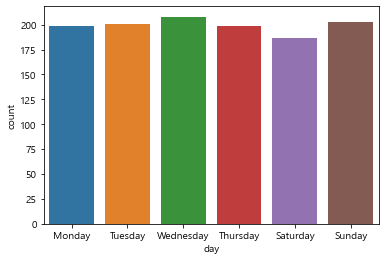

In [15]:
# 일별 생산성
sns.countplot(data=train, x='day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])

<AxesSubplot:xlabel='targeted_productivity', ylabel='actual_productivity'>

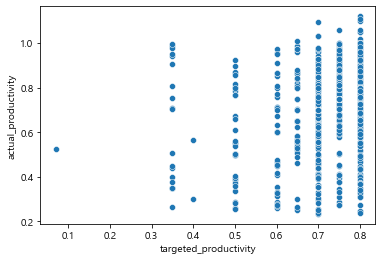

In [16]:
# 목표 생산성
sns.scatterplot(data=train, x='targeted_productivity', y='actual_productivity')

In [17]:
# 범주형 데이터 수치형 변환
train_df = train.copy()

quarter2num = {i:enu for enu, i in enumerate(train_df.quarter.unique())}
depart2num = {i:enu for enu, i in enumerate(train_df.department.unique())}
day2num = {i:enu for enu, i in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'])}

train_df.quarter = train_df.quarter.map(quarter2num)
train_df.department = train_df.department.map(depart2num)
train_df.day = train_df.day.map(day2num)

<AxesSubplot:>

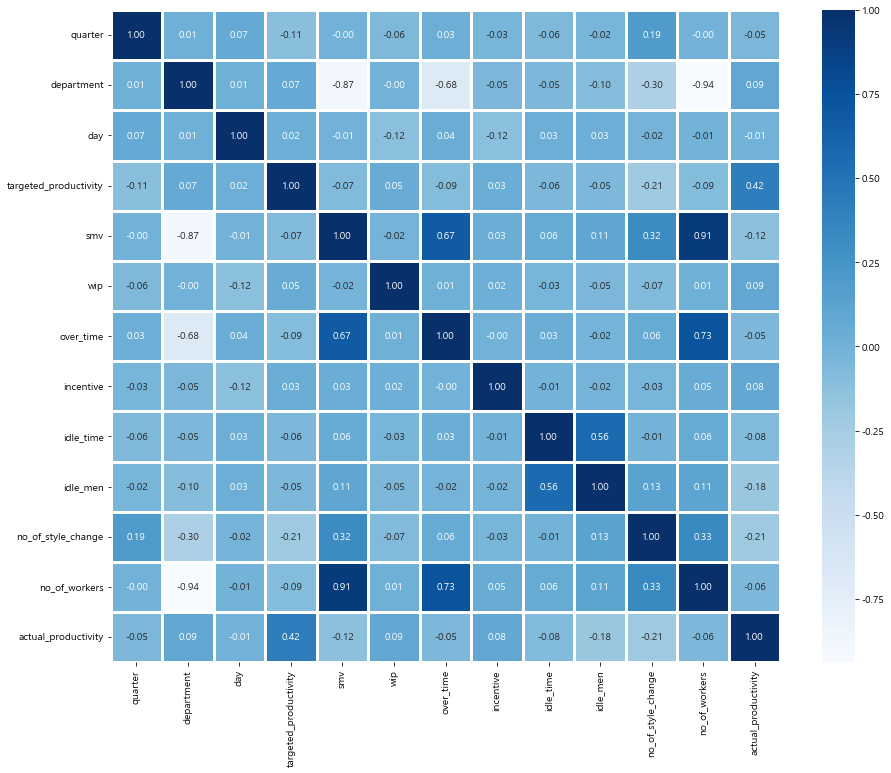

In [18]:
# 상관관계
corr = train_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=3, cmap='Blues')

## 3. 데이터 전처리

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int64  
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   int64  
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 131.0+ 

In [20]:
X = train.drop(columns=['ID', 'actual_productivity'])
y = train['actual_productivity']

In [21]:
target = test.drop(columns=['ID'])

In [22]:
# 범주형 데이터 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
qual_col = ['quarter', 'department', 'day']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(X[i])
    X[i] = le.transform(X[i])
    
    for label in np.unique(target[i]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    target[i] = le.transform(target[i])

In [23]:
X.shape, y.shape, target.shape

((1197, 12), (1197,), (818, 12))

## 4. 모델링

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

### KFold로 교차검증

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### GradientBoostingRegressor

In [26]:
gb = GradientBoostingRegressor(random_state=42)

In [27]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    gb.fit(X_train, y_train)
    pred = gb.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [28]:
gb_mae = np.mean(mae_list)
gb_mae

0.2837589091462512

In [29]:
gb_pred = np.zeros((target.shape[0]))
gb_pred = gb.predict(target)

In [30]:
submission['actual_productivity'] = gb_pred
submission.to_csv('./result/gb.csv', index=False)

### RandomForestRegressor

In [31]:
rf = RandomForestRegressor(random_state=42)

In [32]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [33]:
rf_mae = np.mean(mae_list)
rf_mae

0.27706290943353684

In [34]:
rf_pred = np.zeros((target.shape[0]))
rf_pred = rf.predict(target)

In [35]:
submission['actual_productivity'] = rf_pred
submission.to_csv('./result/rf.csv', index=False)

### XGBRegressor

In [36]:
xgb = XGBRegressor(random_state=42)

In [37]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [38]:
xgb_mae = np.mean(mae_list)
xgb_mae

0.28259238301175627

In [39]:
xgb_pred = np.zeros((target.shape[0]))
xgb_pred = xgb.predict(target)

In [40]:
submission['actual_productivity'] = xgb_pred
submission.to_csv('./result/xgb.csv', index=False)

### LGBMRegressor

In [41]:
lgbm = LGBMRegressor(random_state=42)

In [42]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    lgbm.fit(X_train, y_train)
    pred = lgbm.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [43]:
lgbm_mae = np.mean(mae_list)
lgbm_mae

0.2874571213625724

In [44]:
lgbm_pred = np.zeros((target.shape[0]))
lgbm_pred = lgbm.predict(target)

In [45]:
submission['actual_productivity'] = lgbm_pred
submission.to_csv('./result/lgbm.csv', index=False)

### CatBoost

In [62]:
cat = CatBoostRegressor(random_state=42, silent=True)

In [63]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    cat.fit(X_train, y_train)
    pred = cat.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [64]:
cat_mae = np.mean(mae_list)
cat_mae

0.2816372949323938

In [65]:
cat_pred = np.zeros((target.shape[0]))
cat_pred = cat.predict(target)

In [66]:
submission['actual_productivity'] = cat_pred
submission.to_csv('./result/cat.csv', index=False)

### RandomForestRegressor - 파라미터 조절

In [46]:
rf500 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [47]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf500.fit(X_train, y_train)
    pred = rf500.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [48]:
rf500_mae = np.mean(mae_list)
rf500_mae

0.2767123104196426

In [49]:
rf500_pred = np.zeros((target.shape[0]))
rf500_pred = rf500.predict(target)

In [50]:
submission['actual_productivity'] = rf500_pred
submission.to_csv('./result/rf500.csv', index=False)

### RandomForestRegressor - GridSearchCV

In [51]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)

In [52]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    grid_cv.fit(X_train, y_train)
    pred = grid_cv.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [53]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 10}

In [54]:
rf_cv = RandomForestRegressor(n_estimators=10,
                             max_depth=10,
                             min_samples_leaf=12,
                             min_samples_split=16,
                             random_state=42,
                             n_jobs=-1)

In [55]:
mae_list = []
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf_cv.fit(X_train, y_train)
    pred = rf_cv.predict(X_test)
    mae = np.sqrt(mean_absolute_error(y_test, pred))
    mae_list.append(mae)

In [56]:
rf_cv_mae = np.mean(mae_list)
rf_cv_mae

0.29291172343071314

In [57]:
rf_cv_pred = np.zeros((target.shape[0]))
rf_cv_pred = rf_cv.predict(target)

In [58]:
submission['actual_productivity'] = rf_cv_pred
submission.to_csv('./result/rf_cv.csv', index=False)

## 5. 분석 결과 시각화

In [68]:
score = {'gb': gb_mae, 'xgb': xgb_mae, 'lgbm': lgbm_mae, 'cat': cat_mae,
         'rf': rf_mae, 'rf500': rf500_mae, 'rf_cv': rf_cv_mae}
score

{'gb': 0.2837589091462512,
 'xgb': 0.28259238301175627,
 'lgbm': 0.2874571213625724,
 'cat': 0.2816372949323938,
 'rf': 0.27706290943353684,
 'rf500': 0.2767123104196426,
 'rf_cv': 0.29291172343071314}

In [69]:
result = pd.DataFrame.from_dict(score, orient='index')
result.reset_index(level=0, inplace=True)
result.columns = ['model', 'nmae']
result

,model,nmae
0,gb,0.283759
1,xgb,0.282592
2,lgbm,0.287457
3,cat,0.281637
4,rf,0.277063
5,rf500,0.276712
6,rf_cv,0.292912


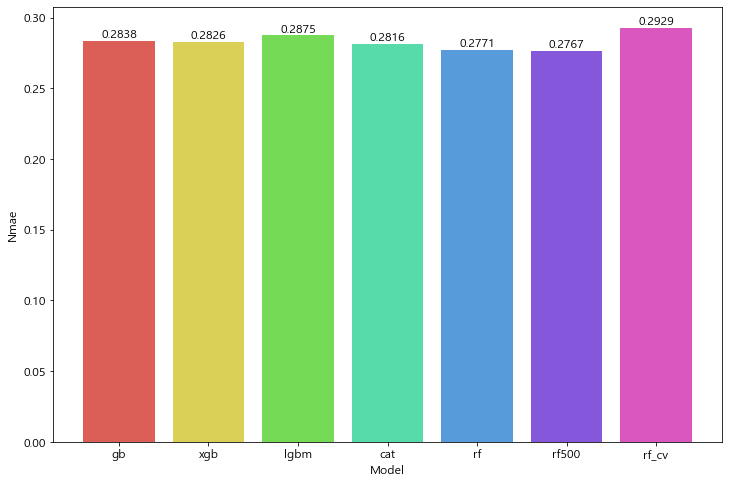

In [70]:
plt.figure(figsize=[12, 8])
plt.rc('font', size=12)
colors = sns.color_palette('hls',len(result['model']))

bar = plt.bar(result['model'], result['nmae'], color=colors)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.4f' % height, ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Nmae')
plt.show()